In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
df = pd.read_csv('insurance.csv')

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.shape

(1338, 7)

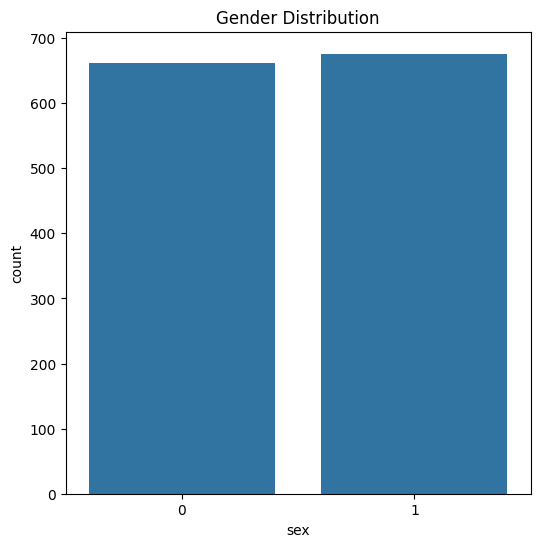

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = df)
plt.title('Gender Distribution')
plt.show()

In [27]:
label_encode = LabelEncoder()

In [28]:
label_gender = label_encode.fit_transform(df.sex)
label_smoker = label_encode.fit_transform(df.smoker)
label_region = label_encode.fit_transform(df.region)

In [29]:
df['sex'] = label_gender
df['smoker'] = label_smoker
df['region'] = label_region

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [31]:
X = df.drop(columns='charges',axis=1)
Y = df['charges']

In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standardized_data = scaler.transform(X)

In [35]:
X = standardized_data

In [36]:
model = LinearRegression()

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [38]:
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
test_data_prediction = model.predict(X_test)

In [40]:
score = metrics.r2_score(Y_test,test_data_prediction)

In [41]:
score

0.7445422986536504

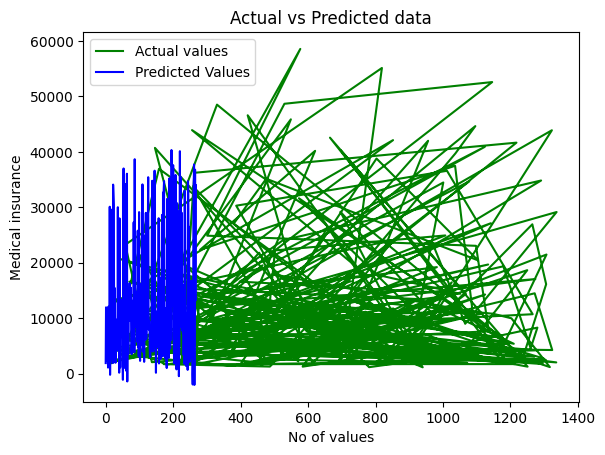

In [42]:
plt.plot(Y_test,color='green',label='Actual values')
plt.plot(test_data_prediction,color='blue',label='Predicted Values')
plt.title('Actual vs Predicted data')
plt.xlabel('No of values')
plt.ylabel('Medical insurance')
plt.legend()

In [43]:
input = (18,1,33.770,1,0,2)

input = np.array(input)

input = input.reshape(1,-1)

input = scaler.transform(input)

predict = model.predict(input)

print(predict)

[3853.31683494]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
